In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import time


In [70]:
#TODO: GUI, print acutal date to plot

In [71]:
#colors for plotting:

colors = ['#845EC2', '#D65DB1', '#FF6F91', '#FF9671', '#FFC75F', '#F9F871', '#5EADC2', '#4AC2C6', '#54D6BB',
          '#7FE6A4', '#B8F288', '#F9F871', '#282F44', '#453A49', '#6D3B47', '#FFD8BE', '#FFEEDD']

In [79]:
def manualmode():
    stocknumber = 'placeholder'
    stocknumber = input('How many positions do you have in your Portfolio? ')
    stocknumber=int(stocknumber)
    stocknames = []
    stockvalues = []
    stockshares = []

    for stock in range(stocknumber):
        stocknames.append(input('Please fill in the Name of Position Nr. {}: '.format(stock+1)))
        stockvalues.append(float(input('Please fill in the actual Value per stock of Position Nr. {}: '.format(stock+1))))
        stockshares.append(float(input('How many shares do you own of Position Nr. {}: '.format(stock+1))))
    for i in range(stocknumber):           #cut down namelenght
        if len(stocknames[i])>8:
            stocknames[i] = stocknames[i][0:10]
        else:
            pass
    df = pd.DataFrame(list(zip(stocknames, stockvalues, stockshares)), columns=['Stock', 'Value', 'Shares'])
    df['TotalValue'] = df['Value'] * df['Shares']
    df.sort_values("TotalValue", axis = 0, ascending = False, 
                 inplace = True, na_position ='last')
    return df

def automaticmode():
    df = pd.read_csv('depot.csv', encoding = 'utf-8')
    cols = [2,4,6,7,8,9,10,12,13,14,15,16,18,20,22,24,25]
    df.drop(df.columns[cols],axis=1,inplace=True)
    return df
    return 0

def plot(df):
    
    labels = df['Stock']
   # labellist = list(labels)
    numbers = df['TotalValue']
    y_pos = np.arange(len(labels))
    # Plot
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_ylabel('Absolute Value')
    ax2 = fig.add_subplot(1,2,2)
    ax1.bar(y_pos, numbers, edgecolor='blue', color=colors)
    ax1.set_xticks(y_pos)
    ax1.set_xticklabels(labels)
    ax2.pie(numbers, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140, colors = colors)
    circle = plt.Circle((0,0),0.70,fc='white')
    ax2.add_artist(circle)
    ax2.text(0.39, 0.53, getdate(), transform=ax2.transAxes, fontsize=15, verticalalignment='top')
    fig.tight_layout(pad=4.5)
    fig.savefig('portfolio_'+str(getdate())+'.jpg')
    fig.show()
    
    
def getdate():
    datestring = time.strftime("%d.%m.%Y")
    return datestring

Welcome to the Portfolio Plotter!
Type 0 for manual submitting stock information or 1 for reading in a csv file: 0
How many positions do you have in your Portfolio? 2
Please fill in the Name of Position Nr. 1: 2
Please fill in the actual Value per stock of Position Nr. 1: 2
How many shares do you own of Position Nr. 1: 2
Please fill in the Name of Position Nr. 2: 2
Please fill in the actual Value per stock of Position Nr. 2: 2
How many shares do you own of Position Nr. 2: 2
  Stock  Value  Shares  TotalValue
0     2    2.0     2.0         4.0
1     2    2.0     2.0         4.0


C:\Users\Marco\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


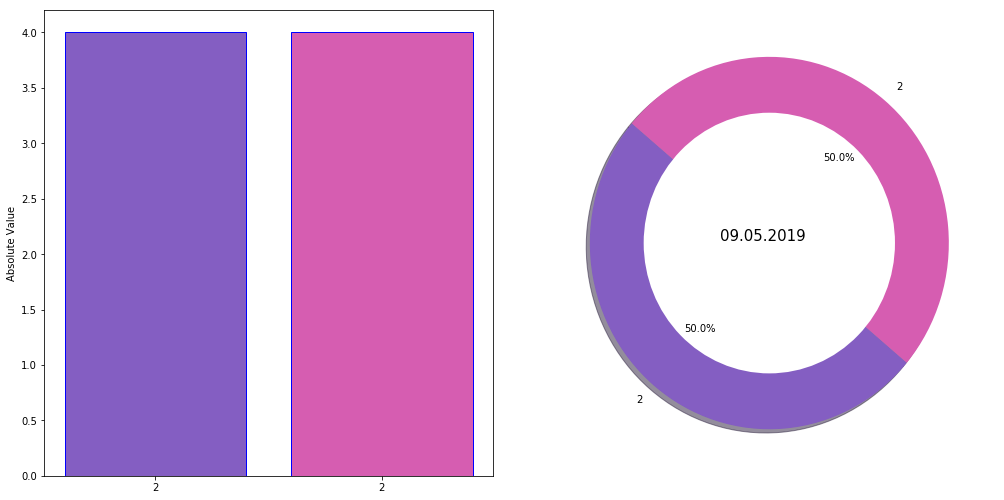

In [78]:
#lets start:

print('Welcome to the Portfolio Plotter!')
mode = 2 

while(mode!=0 and mode!=1):
    mode = int(input('Type 0 for manual submitting stock information or 1 for reading in a csv file: '))
    if (mode!=0 and mode!=1):
        print("You entered a false character, please try again! \n")

if mode == 0:
    df = manualmode()
    print(df)
    plot(df)